# Знакомство с набором данных MNIST. Построение модели KNeighborsClassifier

### Основы API

Чаще всего использование API Scikit-Learn Estimator происходит следующим образом:

1. Выбирается класс модели, импортировав соответствующий класс из Scikit-Learn.
2. Подбираем значения гиперпараметров модели, инстанцировав класс модели с нужными значениями параметров.
3. Разделение данные на матрицу признаков и целевой вектор.
4. Настройка модели посредством метода `fit` экземпляра модели.
5. Применение модели к новым данным:
   - Для `supervised learning` (обучение с учителем) мы предсказываем метки для неизвестных данных с помощью метода `predict`.
   - Для `unsupervised learning` (обучение без учителя) мы преобразуем или оцениваем свойства примеров из набора данных с помощью методов `transform` или `predict`.

Согласно вышеуказнной последовательность требуется выполнить следующее задание:

1. Загрузить набор данных [MNIST]( http://yann.lecun.com/exdb/mnist/ )
2. Исследовать его. Вывести разнообразные числовые характериcтики набора данных, а также визуализировать отдельные элементы данных.
3. Разработать программный код, который позволит построить модель KNeighborsClassifier
4. Вывести метрики Confusion Matrix, Precision, Recall
5. Описать полученные результаты

Бонус 
    На втором семинаре было дано введение в объектно-ориентированное программирование, попробуйте реализовать собственный класс модели. 
    Реализация должна поддерживать API Scikit-Learn, что позволит использовать возможности Scikit-Learn


### Reading the train and test data with the help of the code given below:

In [1]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test) 

In [2]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = 'input'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte')
test_images_filepath     = join(input_path, 't10k-images-idx3-ubyte')
test_labels_filepath     = join(input_path, 't10k-labels-idx1-ubyte')

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()


In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
print(f"""
Shape of the x_train: {x_train.shape}
Shape of the y_train: {y_train.shape}
Shape of the x_test: {x_test.shape}
Shape of the y_test: {y_test.shape}
"""
     )


Shape of the x_train: (60000, 28, 28)
Shape of the y_train: (60000,)
Shape of the x_test: (10000, 28, 28)
Shape of the y_test: (10000,)



Датасет MNIST состоит из 70к рядов и 28 колонок, 60к из которых уже отделены для трэйна, а 10к для теста. Датасет представляет из себя квадраты размером 28х28 пикселей изображающих арабские цифры в оттенках серого.

In [4]:
train_X = x_train.reshape(x_train.shape[0], -1)
test_X = x_test.reshape(x_test.shape[0], -1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

In [5]:
train_df = pd.DataFrame(X_train_scaled)
test_df = pd.DataFrame(X_test_scaled)

# Добавим столбцы с метками классов
train_df['Target'] = y_train
test_df['Target'] = y_test

In [6]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


В данном датафрейме 785 колонок и 60к рядов. Каждые 28 колонок представляют из себя ряд из 28 пикселей, а последняя колонка "Target"-цифра, которая изображена на соответствующей фотографии

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to Target
dtypes: float64(784), uint8(1)
memory usage: 358.9 MB


In [8]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Target
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000350,0.000180,0.000076,0.000060,0.000032,0.0,0.0,0.0,0.0,4.453933
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015576,0.011225,0.006667,0.006607,0.005590,0.0,0.0,0.0,0.0,2.889270
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,9.000000


In [9]:
print("Среднее значение для каждого пикселя:")
print(train_df.drop(columns=['Target']).mean())

print("\nМедиана для каждого пикселя:")
print(train_df.drop(columns=['Target']).median())

print("\nДисперсия для каждого пикселя:")
print(train_df.drop(columns=['Target']).var())

print("\nСтандартное отклонение для каждого пикселя:")
print(train_df.drop(columns=['Target']).std())

print("\nМинимальное значение для каждого пикселя:")
print(train_df.drop(columns=['Target']).min())

print("\nМаксимальное значение для каждого пикселя:")
print(train_df.drop(columns=['Target']).max())

Среднее значение для каждого пикселя:
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
779    0.000032
780    0.000000
781    0.000000
782    0.000000
783    0.000000
Length: 784, dtype: float64

Медиана для каждого пикселя:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
Length: 784, dtype: float64

Дисперсия для каждого пикселя:
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
779    0.000031
780    0.000000
781    0.000000
782    0.000000
783    0.000000
Length: 784, dtype: float64

Стандартное отклонение для каждого пикселя:
0      0.00000
1      0.00000
2      0.00000
3      0.00000
4      0.00000
        ...   
779    0.00559
780    0.00000
781    0.00000
782    0.00000
783    0.00000
Length: 784, dtype: float64

Минимальное значение для каждого пикселя:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      .

## Overfitted KNN. Просто выучим каждую точку

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [11]:
model.fit(train_df.drop('Target',axis=1), train_df.Target)
y_model = model.predict(test_df.drop('Target',axis=1))

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9691

In [13]:
test_df['Prediction']=y_model
test_df

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,Target,Prediction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


In [14]:
error=test_df[test_df.Target!=test_df.Prediction]
error.reset_index(drop=True,inplace=True)
error

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,Target,Prediction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1
306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,9


In [15]:
error['Concat']=error.Target.astype(str)+ ' '+error.Prediction.astype(str)

In [16]:
from collections import defaultdict

pairs=defaultdict(list)

for i in range(len(error.Concat.unique())):
    pairs[error.Concat.unique()[i][0]].append(error.Concat.unique()[i][-1])
    pairs[error.Concat.unique()[i][0]].sort()
#pairs

### С какими значениями модель плохо справляется:

In [17]:
for x in sorted(pairs.keys()):
    print(f'Путает цифру {x} с: {pairs[x]}')

Путает цифру 0 с: ['1', '2', '5', '6', '7']
Путает цифру 1 с: ['2', '4', '5', '6']
Путает цифру 2 с: ['0', '1', '3', '4', '6', '7', '8']
Путает цифру 3 с: ['1', '2', '4', '5', '7', '8', '9']
Путает цифру 4 с: ['1', '6', '7', '8', '9']
Путает цифру 5 с: ['0', '1', '3', '4', '6', '7', '8', '9']
Путает цифру 6 с: ['0', '1', '4', '5']
Путает цифру 7 с: ['1', '2', '3', '4', '9']
Путает цифру 8 с: ['0', '1', '2', '3', '4', '5', '6', '7', '9']
Путает цифру 9 с: ['0', '1', '2', '3', '4', '5', '6', '7', '8']


In [18]:
from matplotlib import pyplot
def draw(row):
    temp=np.array(row.tolist()).reshape((28,28))
    pyplot.imshow(temp, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

## Вывод ошибочных классификаций модели


    Actual value: 5
    Predicted: 6
    


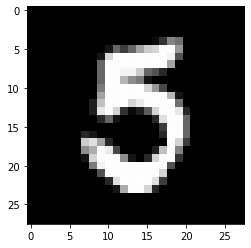


    Actual value: 8
    Predicted: 6
    


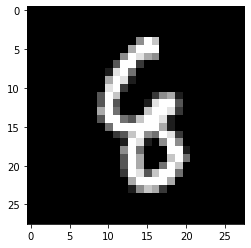


    Actual value: 2
    Predicted: 7
    


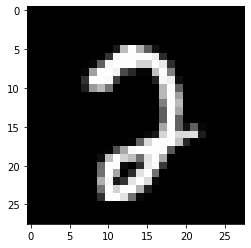


    Actual value: 8
    Predicted: 9
    


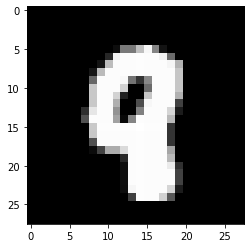


    Actual value: 7
    Predicted: 1
    


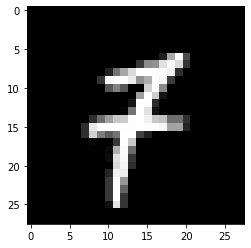

In [19]:
for c in range(5):
    x=random.randint(0,len(error)-1)
    
    print(f"""
    Actual value: {error.Target.iloc[x]}
    Predicted: {error.Prediction.iloc[x]}
    """)
    draw(error.drop(['Target','Prediction','Concat'],axis=1).iloc[x])

## До этого момента мы всё делали на уровне инстинктов, слушая лишь нашу чуйку, но таким методом трудно получить качественную модель.

## Hyperparameter tuning with the help of cv

In [20]:
k_range = range(1, 11,2)
#Лучше подбирать нечетное К
k_scores = {}

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_df.drop('Target',axis=1), train_df.Target)
    y_model = model.predict(test_df.drop(['Target','Prediction'],axis=1))
    
    k_scores[k]=accuracy_score(y_model,y_test)

k_scores

{1: 0.9691, 3: 0.9705, 5: 0.9688, 7: 0.9694, 9: 0.9659}

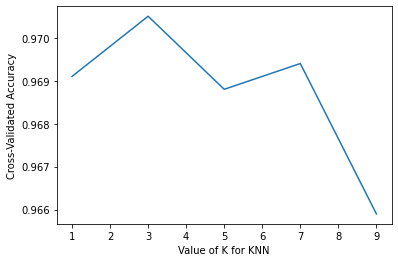

In [21]:
plt.plot(k_scores.keys(), k_scores.values())
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [22]:
max(k_scores.items(),key=lambda x: x[1])

(3, 0.9705)

#### Перебрав параметр К от 1 до 7, мы можем заметить, что пиковая точка была достигнута при К=3. Это не особо улучшило наши предсказания на тестовых данных, но проверив их ещё раз с помощью кросс-валидации, надеюсь, что получим более точную оценку перформанса модели.

### КНН модель различает цифры с точностью 97%

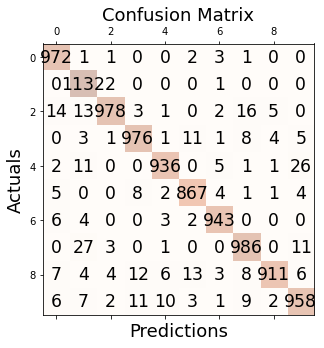

In [23]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_model)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Confusion Matrix заметно облегчает нашу жизнь, простотой пользования и информативностью.

In [24]:
cm = pd.DataFrame(conf_matrix, columns=list("0123456789"), index=list("0123456789")) 
cm

,0,1,2,3,4,5,6,7,8,9
0,972,1,1,0,0,2,3,1,0,0
1,0,1132,2,0,0,0,1,0,0,0
2,14,13,978,3,1,0,2,16,5,0
3,0,3,1,976,1,11,1,8,4,5
4,2,11,0,0,936,0,5,1,1,26
5,5,0,0,8,2,867,4,1,1,4
6,6,4,0,0,3,2,943,0,0,0
7,0,27,3,0,1,0,0,986,0,11
8,7,4,4,12,6,13,3,8,911,6
9,6,7,2,11,10,3,1,9,2,958


#### В вышеприведенных таблицах мы можем заметить, что все значения находящиеся на диагонали представляют из себя правильно предсказанные значения, в то время как всё что ниже и выше главной диагонали-ошибки нашей модели. 

Рассмотрим как пример колонку с 0:

Модель правильно классифицировала эту цифру 970 раз

1-раз классифицировала ее как 1

1-раз классифицировала ее как 2

1-раз классифицировала ее как 5

1-раз классифицировала ее как 6

1-раз классифицировала ее как 7


классифицировала 0 вместо 2-12 раз

классифицировала 0 вместо 4-2 раз

классифицировала 0 вместо 5-6 раза

классифицировала 0 вместо 6-6 раз

классифицировала 0 вместо 8-7 раз

классифицировала 0 вместо 9-6 раз

In [25]:
print("Точность предсказания каждой цифры:\n")
for i in cm.index:
    print(f"Точность для {i}: {cm[i][i] / cm.sum(axis=0)[i] }\n")

Точность предсказания каждой цифры:

Точность для 0: 0.9604743083003953

Точность для 1: 0.9417637271214643

Точность для 2: 0.9868819374369324

Точность для 3: 0.9663366336633663

Точность для 4: 0.975

Точность для 5: 0.965478841870824

Точность для 6: 0.9792315680166147

Точность для 7: 0.9572815533980582

Точность для 8: 0.9859307359307359

Точность для 9: 0.9485148514851485



In [26]:
FP = cm.sum(axis=0) - np.diag(cm)   
FN = cm.sum(axis=1) - np.diag(cm) 
TP = pd.Series(np.diag(cm), index=list("0123456789"))
TN = np.matrix(cm).sum() - (FP + FN + TP) 

Согласно всемизвестным формулам:

Precision=TP/(TP+FP)

Recall=TP/(TP+FN)

F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

In [27]:
metrics=pd.DataFrame(columns=['Precision','Recall','F1 Score'], index=list("0123456789"))

metrics['Precision']=TP/(TP+FP)
metrics["Recall"]=TP/(TP+FN)
metrics['F1 Score']=2*metrics.Precision*metrics.Recall/(metrics.Precision+metrics.Recall)

In [28]:
metrics

,Precision,Recall,F1 Score
0,0.960474,0.991837,0.975904
1,0.941764,0.997357,0.968763
2,0.986882,0.947674,0.966881
3,0.966337,0.966337,0.966337
4,0.975000,0.953157,0.963955
5,0.965479,0.971973,0.968715
6,0.979232,0.984342,0.981780
7,0.957282,0.959144,0.958212
8,0.985931,0.935318,0.959958
9,0.948515,0.949455,0.948985


## Попробуем написать собственную модель KNN

### Необходимые функции для подсчета расстояния между точками

In [29]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def minkowski_distance(x1, x2, p):
    return np.power(np.sum(np.abs(x1 - x2) ** p), 1/p)

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def hamming_distance(x1, x2):
    if len(x1) != len(x2):
        raise ValueError("Input sequences must have the same length.")
    
    return sum(xi != xi2 for xi, xi2 in zip(x1, x2))

def cosine_distance(x1, x2):
    dot_product = np.dot(x1, x2)
    norm_x1 = np.linalg.norm(x1)
    norm_x2 = np.linalg.norm(x2)
    
    if norm_x1 == 0 or norm_x2 == 0:
        return 1.0  # Avoid division by zero for zero vectors
    
    return 1.0 - (dot_product / (norm_x1 * norm_x2))


## Сам класс KNN

In [30]:
class KNN:
    def __init__(self, k=3, func_name=euclidean_distance):
        self.k = k
        self.func_name = func_name
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def _predict(self, x):
        distances = [self.func_name(x, x_train) for x_train in self.X_train]
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        most_common_label = unique_labels[np.argmax(counts)]
        
        return most_common_label

In [31]:
scores={}
functions=[euclidean_distance,manhattan_distance,hamming_distance,cosine_distance]
for func in functions:
    knn=KNN(k=3,func_name=func)
    knn.fit(x_train,y_train)
    predictions=knn.predict(x_test[:100])
    scores[func.__name__]=np.sum(predictions==y_test[:100])/100

### Так как моих мощностей было недостаточно для проведения подобного теста, я выбрал лишь часть даты как семпл размеров в 100 строк.

### Полученные результаты:

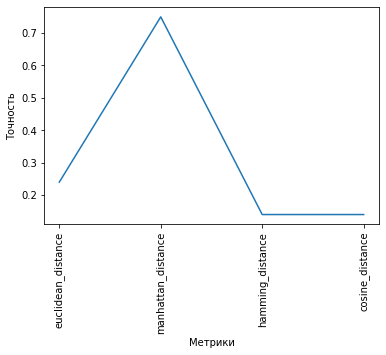

In [32]:
plt.plot([x for x in scores.keys()], scores.values())
plt.xlabel('Метрики')
plt.xticks(rotation=90)
plt.ylabel('Точность')
plt.show()

In [33]:
max(scores.items(),key=lambda x: x[1])

('manhattan_distance', 0.75)

# Очевидно, что класс KNN из библиотеки scikit-learn справился с поставленной задачей лучше, но написание собственной модели как опыт-запомнится больше. Спасибо!

In [34]:
import sklearn
sorted(sklearn.neighbors.VALID_METRICS['brute'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'haversine',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'nan_euclidean',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule']

In [35]:
print("Infinite values in X_train:", not np.isfinite(X_train_scaled).all())

Infinite values in X_train: False


In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3],
    'metric': [
    'braycurtis',
    'canberra',
    'chebyshev',
    'cityblock',
    'correlation',
    'cosine',
    'dice',
    'euclidean',
    'hamming',
    'haversine',
    'jaccard',
    'kulsinski',
    'l1',
    'l2',
    'manhattan',
    'matching',
    'minkowski',
    'nan_euclidean',
    'rogerstanimoto',
    'russellrao',
    'sokalmichener',
    'sokalsneath',
    'sqeuclidean',
    'yule'
]
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(train_df.drop('Target',axis=1)[:100],train_df.Target[:100])

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(test_df[:100].drop(['Target','Prediction'],axis=1)[:100])
test_accuracy = accuracy_score(test_df.Target[:100], y_pred)
print("Test Set Accuracy with Best Model:", test_accuracy)

Best Hyperparameters: {'metric': 'matching', 'n_neighbors': 3}
Best Score: 0.8193701723113488
Test Set Accuracy with Best Model: 0.7


# По идее, надо было провести грид серч по всему датафрейму, но опять-таки, меня компьютер подвёл, поэтому имеем, что имеем

In [37]:
model=KNeighborsClassifier(metric='matching',n_neighbors=3)
model.fit(train_df.drop('Target',axis=1),train_df.Target)
y_pred = model.predict(test_df.drop(['Target','Prediction'],axis=1))

accuracy_score(test_df.Target, y_pred)

0.9615

## Благодаря GridSearchCV и его автоподбору параметров, мы без особого труда получили модель с результатом немного похуже. Я уверен, что если бы во время кросс-валидации, мы могли пройтись по всему датасету, то результат был иной.


# Попробуем применить логистическую регрессию (multinomial) для нашей задачи

In [38]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

valid_params = logistic_regression.get_params()

for param, values in valid_params.items():
    print(param, ":", values)

C : 1.0
class_weight : None
dual : False
fit_intercept : True
intercept_scaling : 1
l1_ratio : None
max_iter : 100
multi_class : auto
n_jobs : None
penalty : l2
random_state : None
solver : lbfgs
tol : 0.0001
verbose : 0
warm_start : False


In [39]:
model=LogisticRegression()

model.fit(train_df.drop('Target',axis=1),train_df.Target)

LogisticRegression()

In [40]:
predict=model.predict(test_df.drop(['Target','Prediction'],axis=1))
accuracy_score(predict,test_df.Target)

0.9251

In [41]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(max_iter=10000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
    'penalty': ['l2'],  
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],  
    'multi_class': ['multinomial'], 
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

grid_search.fit(train_df.drop('Target',axis=1)[:1000],train_df.Target[:1000])

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

test_accuracy = best_model.score(test_df.drop(['Target','Prediction'],axis=1)[:1000], test_df.Target[:1000] )
print("Test accuracy with best model:", test_accuracy)

Best hyperparameters: {'C': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.857
Test accuracy with best model: 0.827


In [42]:
best_model.fit(train_df.drop('Target',axis=1),train_df.Target)

LogisticRegression(C=10, max_iter=10000, multi_class='multinomial',
                   solver='saga')

In [43]:
predict=best_model.predict(test_df.drop(['Target','Prediction'],axis=1))
accuracy_score(predict,test_df.Target)

0.9236

# KNN с дефолтными параметрами и К=3, показала лучше значения чем логистическая регрессия с параметрами полученными на семпле из датасета длинною 1000 строк

# Воспользуемся SVM для классификации цифр датасета MNIST

In [44]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(train_df.drop('Target',axis=1),train_df.Target)

SVC()

In [45]:
predict=svc.predict(test_df.drop(['Target','Prediction'],axis=1))
accuracy_score(predict,test_df.Target)

0.9791

In [46]:
svc=SVC(kernel='rbf')
svc.fit(x_train.reshape(x_train.shape[0], -1),train_df.Target)
predict=svc.predict(x_test.reshape(x_test.shape[0], -1))
accuracy_score(predict,test_df.Target)

0.9792

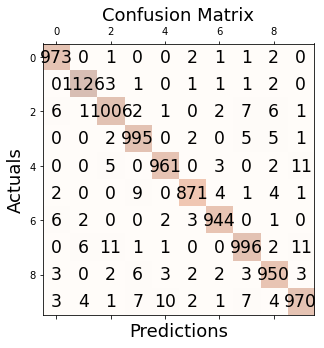

In [47]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=test_df.Target, y_pred=predict)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [48]:
clf=SVC(kernel='linear')
clf.fit(train_df.drop('Target',axis=1),train_df.Target)
predict=clf.predict(test_df.drop(['Target','Prediction'],axis=1))
accuracy_score(predict,test_df.Target)

0.9401

In [49]:
clf=SVC(kernel='poly')
clf.fit(train_df.drop('Target',axis=1),train_df.Target)
predict=clf.predict(test_df.drop(['Target','Prediction'],axis=1))
accuracy_score(predict,test_df.Target)

0.9771

In [50]:
degrees = [0, 1, 2, 3, 4, 5, 6]
best_score = 0
best_degree = None
best_svc = None

for degree in degrees:
    svc = SVC(kernel='poly', degree=degree)
    
    svc.fit(train_df.drop('Target',axis=1)[:1000],train_df.Target[:1000])
    
    score = svc.score(test_df.drop(['Target','Prediction'],axis=1)[:1000],test_df.Target[:1000])
    
    if score > best_score:
        best_score = score
        best_degree = degree
        best_svc = svc

print("Best degree:", best_degree)
print("Best score:", best_score)

Best degree: 2
Best score: 0.871


In [51]:
clf=SVC(kernel='poly',degree=2)
clf.fit(train_df.drop('Target',axis=1),train_df.Target)
predict=clf.predict(test_df.drop(['Target','Prediction'],axis=1))
accuracy_score(predict,test_df.Target)

0.9774

In [52]:
clf=SVC(kernel='sigmoid')
clf.fit(train_df.drop('Target',axis=1),train_df.Target)
predict=clf.predict(test_df.drop(['Target','Prediction'],axis=1))
accuracy_score(predict,test_df.Target)

0.7757

In [53]:
?SVC

In [54]:
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

svc = SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(train_df.drop('Target',axis=1)[:1000],train_df.Target[:1000])

print("Best hyperparameters found:")
print(grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Best hyperparameters found:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.90


In [55]:
best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(test_df.drop(['Target','Prediction'],axis=1), test_df.Target)
print("Test set accuracy of the best model: {:.2f}".format(test_accuracy))

Test set accuracy of the best model: 0.91


# Проверим SVC с параметрами полученными выше, но уже на всей выборке

In [56]:
clf=grid_search.best_estimator_
clf.fit(train_df.drop('Target',axis=1),train_df.Target)
predict=clf.predict(test_df.drop(['Target','Prediction'],axis=1))
accuracy_score(predict,test_df.Target)

0.9832

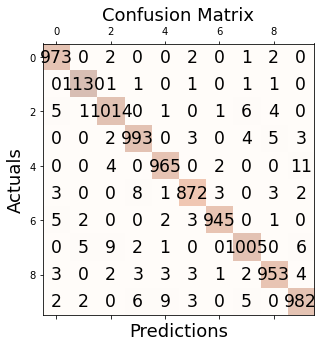

In [57]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=test_df.Target, y_pred=predict)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Тут у меня возникла теория, что в нашем случае учет выбросов необязателен, поэтому решил попробовать стандартное скалирование на лучшей модели, чисто ради интереса

In [58]:
train_X = x_train.reshape(x_train.shape[0], -1)
test_X = x_test.reshape(x_test.shape[0], -1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

In [59]:
clf=grid_search.best_estimator_
clf.fit(X_train_scaled,train_df.Target)
predict=clf.predict(X_test_scaled)
accuracy_score(predict,test_df.Target)

0.8673

# По итогу мы имеем:

### 1. KNN(k=1)- 0.9691
### 2. KNN(k=3)- 0.9705
### 3. My KNN(k=3,func_name='manhattan_distance')- 0.75
### 4. KNN(k=3,metric='matching')- 0.9615
### 5. LogisticRegression(default parameters)- 0.9251
### 6. LogisticRegression(C=10, max_iter=10000, multi_class='multinomial',solver='saga')- 0.9236
### 7. SVC(defauld parameters)- 0.9791
### 8. SVC(kernel='rbf')- 0.9792
### 9. SVC(kernel='linear')- 0.9401
### 10. SVC(kernel='poly',degree=3)- 0.9771
### 11. SVC(kernel='poly',degree=2)- 0.9774
### 12. SVC(kernel='sigmoid')- 0.7757
### 13. SVC(C=10, 'gamma'=0.01, 'kernel'='rbf')- 0.9832
### 14. Standard Scaled SVC(C=10, 'gamma'=0.01, 'kernel'='rbf')- 0.8673